# 4.1 - Evaluación

### Regresión

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [3]:
X_train, X_test, y_train, y_test = tts(data.data, data.target)

In [4]:
rf=RFR()
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [5]:
y_pred[:10]

array([106.5 , 111.66,  75.83, 175.75, 116.5 , 198.51,  89.31, 241.94,
       126.67, 214.56])

In [6]:
y_test[:10]

array([ 72.,  83.,  53., 189., 114., 120., 252., 155., 136., 121.])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [7]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

3280.1669558558556

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [8]:
mse(y_test, y_pred)**0.5

57.272741822404974

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [9]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred)**0.5

0.46718619352848234

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [10]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

45.88675675675675

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [11]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.3178286323593098

In [12]:
rf.score(X_test, y_test)

0.3178286323593098

### Clasificación

In [13]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [31]:
svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [32]:
y_pred[:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [15]:
y_test[:10]

array([2, 1, 2, 0, 0, 2, 0, 1, 0, 0])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [16]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.6888888888888889

In [17]:
svc.score(X_test, y_test)

0.6888888888888889

##### Precision

In [18]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.6033333333333334

##### Recall

In [19]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.6303030303030303

##### F1_Score

In [20]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.58005698005698

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [21]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[16,  1,  3],
       [ 0, 14,  0],
       [ 0, 10,  1]])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

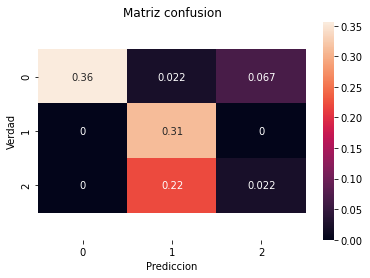

In [23]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test) # predice etiqueta

y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve la prob

In [25]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

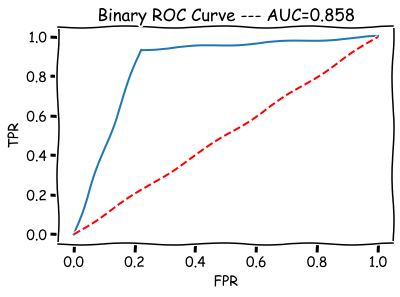

In [26]:
with plt.xkcd():  # mal pintao, y_pred
    fpr, tpr, umbrales=roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

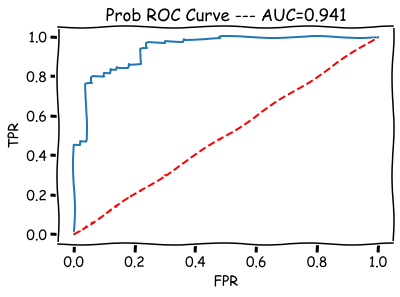

In [27]:
with plt.xkcd(): # bien pintá, y_prob
    fpr, tpr, umbrales=roc(y_test, y_prob)
    a=auc(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Prob ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

In [28]:
acc(y_test, y_pred)  # accuracy

0.8811188811188811

In [29]:
umbrales

array([1.99588403e+00, 9.95884026e-01, 9.83687543e-01, 9.83358337e-01,
       9.82697615e-01, 9.82620242e-01, 8.68744695e-01, 8.55026041e-01,
       8.13316517e-01, 7.84121744e-01, 6.89822627e-01, 6.42187424e-01,
       6.19320952e-01, 5.71305512e-01, 5.49144929e-01, 5.28449900e-01,
       5.15701525e-01, 4.68054794e-01, 2.97114571e-01, 2.83621104e-01,
       9.21899276e-02, 5.39993314e-02, 3.56998219e-02, 2.78859547e-02,
       2.27896869e-02, 4.78844558e-03, 1.70413915e-03, 3.99699558e-05])

In [30]:
df=pd.DataFrame()

df['real']=y_test
df['prediccion']=y_pred

df.head()

,real,prediccion
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
